In [1]:
import pandas as pd
data = pd.read_csv("data/full_educational_data.csv", index_col=0)
data.head()

,LOCATION,PISASCIENCE,PISAMATH,PISAREADING,EDUPUBEXP,EDUPRIVATEEXP,STUDPERTEACHER,TEACHINGHR,INSTRUCTTIME,GDP,TAXREV
0,AUS,503,491,503,19954.495,19954.495,14.926000,844.353083,11000.00000,1323863.624,401.232
1,AUT,490,499,484,26488.460,26488.460,11.073000,658.200000,6420.00000,503361.417,192.155
2,BEL,499,508,493,13297.550,13297.550,11.083500,NaN,NaN,600269.926,238.347
3,CAN,518,512,520,11771.410,11771.410,16.691000,762.305877,8289.23755,1849252.231,576.768
4,CZE,497,499,490,16024.522,16024.522,14.722667,789.062500,7056.00000,437355.916,87.088


In [2]:
data = data.dropna().reset_index()
data.shape

(33, 12)

In [3]:
# Courtesy of Luke Duncalfe, https://github.com/lukes
full_codes = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
full_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [4]:
full_codes.drop(["alpha-2", "country-code", "iso_3166-2", "intermediate-region", "region-code", "sub-region-code", "intermediate-region-code"], 
          axis = 1, 
          inplace=True)
full_codes.columns = ["COUNTRY", "LOCATION", "REGION", "SUBREGION"]
full_codes.head()

,COUNTRY,LOCATION,REGION,SUBREGION
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [5]:
data = pd.merge(data, full_codes, on = 'LOCATION', how = 'left')
data = data.drop(['index'], axis=1)
data.head()

,LOCATION,PISASCIENCE,PISAMATH,PISAREADING,EDUPUBEXP,EDUPRIVATEEXP,STUDPERTEACHER,TEACHINGHR,INSTRUCTTIME,GDP,TAXREV,COUNTRY,REGION,SUBREGION
0,AUS,503,491,503,19954.495,19954.495,14.926000,844.353083,11000.00000,1323863.624,401.232,Australia,Oceania,Australia and New Zealand
1,AUT,490,499,484,26488.460,26488.460,11.073000,658.200000,6420.00000,503361.417,192.155,Austria,Europe,Western Europe
2,CAN,518,512,520,11771.410,11771.410,16.691000,762.305877,8289.23755,1849252.231,576.768,Canada,Americas,Northern America
3,CZE,497,499,490,16024.522,16024.522,14.722667,789.062500,7056.00000,437355.916,87.088,Czechia,Europe,Eastern Europe
4,DNK,493,509,501,27009.350,27009.350,10.285000,489.000000,10960.00000,333035.355,157.662,Denmark,Europe,Northern Europe


In [6]:
data.iloc[32,11] = 'OECD'
data.iloc[32,12] = 'OECD'
data.iloc[32,13] = 'OECD'

In [7]:
data.tail()

,LOCATION,PISASCIENCE,PISAMATH,PISAREADING,EDUPUBEXP,EDUPRIVATEEXP,STUDPERTEACHER,TEACHINGHR,INSTRUCTTIME,GDP,TAXREV,COUNTRY,REGION,SUBREGION
28,LVA,487,496,479,13138.585,13138.585,10.137000,851.825000,5976.57324,59505.492,10.712,Latvia,Europe,Northern Europe
29,SVN,507,509,495,19336.635,19336.635,13.594000,784.500000,6388.89502,80823.475,20.174,Slovenia,Europe,Southern Europe
30,COL,413,391,412,3397.583,3397.583,24.606500,836.600000,9800.00000,747103.675,64.384,Colombia,Americas,Latin America and the Caribbean
31,LTU,482,481,476,14437.792,14437.792,9.755667,637.900000,7079.60913,101910.429,16.228,Lithuania,Europe,Northern Europe
32,OAVG,489,489,487,20445.140,20445.140,13.382000,909.173955,7656.06079,1748119.587,430.855,OECD,OECD,OECD


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [9]:
X = data.drop(["LOCATION", "COUNTRY", "SUBREGION", "REGION"], axis=1)
y = data[["LOCATION", "COUNTRY", "REGION"]]

In [10]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
X_Scale[:5,:]

array([[ 0.59770136,  0.13088557,  0.67400332,  0.2071771 ,  0.2071771 ,
         0.3199263 ,  0.63150947,  2.65738247, -0.11928244, -0.06126318],
       [ 0.1202081 ,  0.38495757, -0.06223376,  0.97290852,  0.97290852,
        -0.62332061, -0.94173524, -0.97640455, -0.34931623, -0.2881932 ],
       [ 1.14865514,  0.79782457,  1.33274176, -0.75181875, -0.75181875,
         0.7520132 , -0.06190012,  0.50665465,  0.0280141 ,  0.12926179],
       [ 0.37731986,  0.38495757,  0.17026216, -0.2533861 , -0.2533861 ,
         0.27014859,  0.16422945, -0.47180007, -0.36782135, -0.40223184],
       [ 0.23039885,  0.70254757,  0.59650468,  1.0339529 ,  1.0339529 ,
        -0.81622966, -2.37170353,  2.62564634, -0.39706838, -0.32563154]])

In [11]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_Scale)

principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])

finalDf2 = principalDf2.join(y)
finalDf2.head()

,principal component 1,principal component 2,LOCATION,COUNTRY,REGION
0,-0.174476,0.761403,AUS,Australia,Oceania
1,-1.401818,-1.019385,AUT,Austria,Europe
2,-0.587732,0.858875,CAN,Canada,Americas
3,-0.166693,-0.328885,CZE,Czechia,Europe
4,-1.829870,-0.759098,DNK,Denmark,Europe


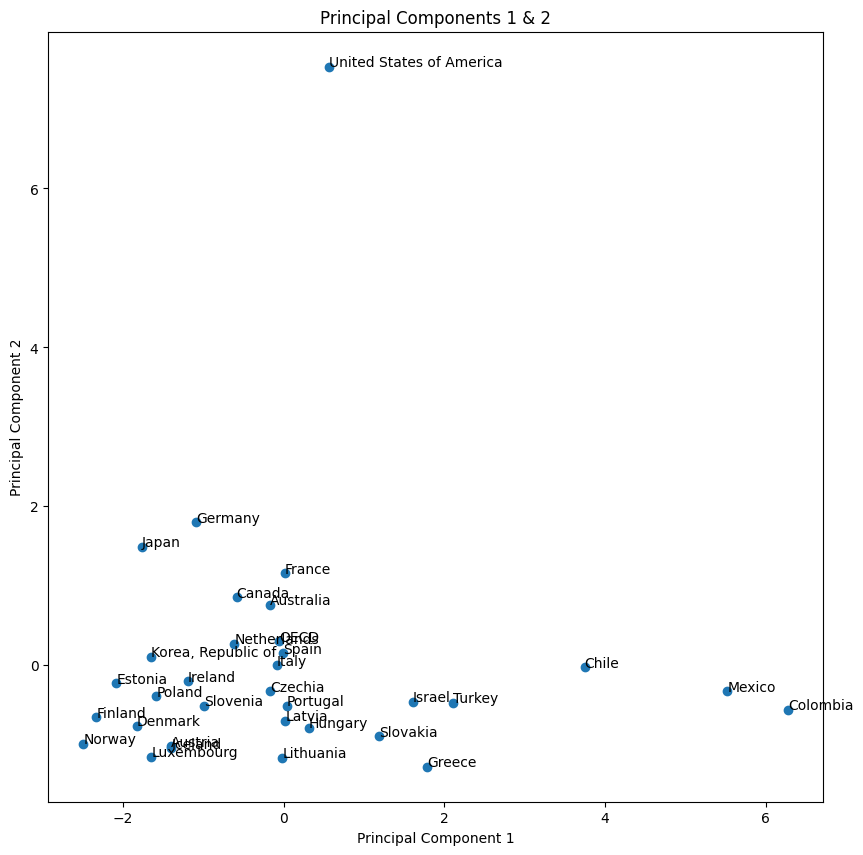

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(finalDf2['principal component 1'], finalDf2['principal component 2'])
ax.set_title('Principal Components 1 & 2')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
for idx, label in enumerate(finalDf2["COUNTRY"].values):
    ax.annotate(label, (finalDf2['principal component 1'].values[idx], finalDf2['principal component 2'].values[idx]))

In [13]:
import plotly.express as px

fig = px.scatter(finalDf2, x='principal component 1', y='principal component 2', text="COUNTRY", color="REGION")
fig.show()

In [14]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X_Scale)

principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf3 = pd.concat([principalDf3, y], axis = 1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,LOCATION,COUNTRY,REGION
0,-0.174476,0.761403,1.333258,AUS,Australia,Oceania
1,-1.401818,-1.019385,0.286701,AUT,Austria,Europe
2,-0.587732,0.858875,-1.236430,CAN,Canada,Americas
3,-0.166693,-0.328885,-0.635984,CZE,Czechia,Europe
4,-1.829870,-0.759098,1.455280,DNK,Denmark,Europe


In [15]:
fig = px.scatter_3d(finalDf3, x='principal component 1', y='principal component 2', z='principal component 3', text='COUNTRY', color='REGION')
fig.show()